# Setting up for 2-dimensional Burgers Equation with a differentiable solver

In [1]:
import numpy as np
import tensorflow as tf
from phi.tf.flow import *


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



## 2D Burgers Equation
$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} - \nu(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u }{\partial y^2})=0$$
$$\frac{\partial v}{\partial t} + v\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} - \nu(\frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v }{\partial y^2})=0$$

In [3]:
# set up the domain
NX = 64 # 64 points in x direction
NY = 64
NT = 200
NU = 0.01
XMIN = -1
YMIN = -1
XMAX = 1
YMAX = 1
TMAX = 1

DX = (XMAX - XMIN) / NX
DY = (YMAX - YMIN) / NY
DT = TMAX / NT

init_coeff = 0.01
init_cond = lambda x, y: x**2 + y**2 # set up the initial condition

x = np.linspace(XMIN, XMAX, NX)
y = np.linspace(YMIN, YMAX, NY)
xx, yy = np.meshgrid(x, y)
cur_u  = tf.cast(init_cond(xx, yy), tf.float32)
cur_u = math.tensor(cur_u, math.spatial('x,y'))
cur_u = CenteredGrid(cur_u, extrapolation.PERIODIC, x=NX, y=NY, bounds=Box(x=(XMIN,XMAX), y=(YMIN, YMAX))) 

sol = [cur_u]

for t in range(NT):
    v1 = diffuse.explicit(sol[-1], NU, DT)
    v2 = advect.semi_lagrangian(v1, v1, DT)
    sol.append(v2)





In [4]:
sol = [s.values.native(s.shape) for s in sol]

sol = np.asarray(sol)
sol.shape


(201, 64, 64)

(64, 64)


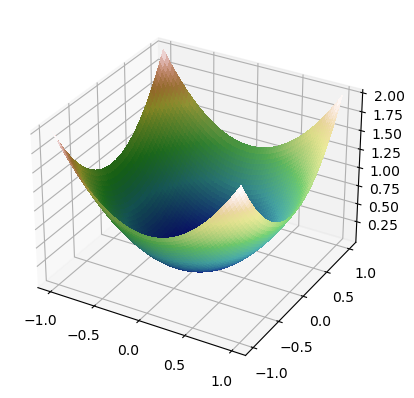

In [14]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
print(sol[0].shape)
ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(sol[0], cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(xx, yy, sol[0], rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

(64, 64)


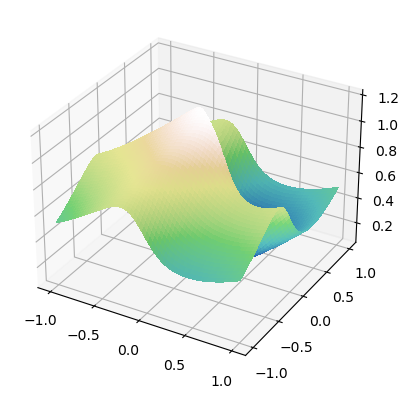

In [16]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
print(sol[0].shape)
ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(sol[-1], cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(xx, yy, sol[-1], rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)